In [ ]:
pip install pandas numpy scikit-learn networkx matplotlib

Average Carbon Emission: 0.88 metric tons
Sustainable Days: 14
Non-Sustainable Days: 16


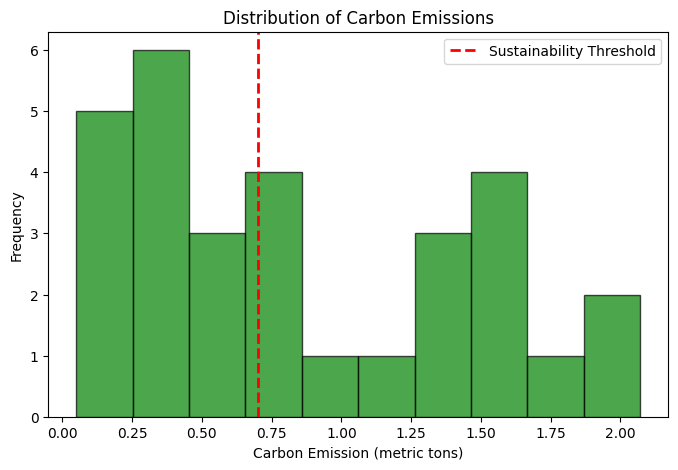

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data.csv")  # Ensure the file path is correct

# Define sustainability threshold
threshold = 0.7

# Add a new column to determine sustainability
df["sustainable"] = df["carbon_emission"] < threshold

# Calculate average carbon footprint
average_emission = df["carbon_emission"].mean()

# Display sustainability summary
sustainable_count = df["sustainable"].sum()
non_sustainable_count = len(df) - sustainable_count

print(f"Average Carbon Emission: {average_emission:.2f} metric tons")
print(f"Sustainable Days: {sustainable_count}")
print(f"Non-Sustainable Days: {non_sustainable_count}")

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(df["carbon_emission"], bins=10, color='green', alpha=0.7, edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Sustainability Threshold")
plt.xlabel("Carbon Emission (metric tons)")
plt.ylabel("Frequency")
plt.title("Distribution of Carbon Emissions")
plt.legend()
plt.show()

Optimized Routes Between Major Hubs: {(11, 2): [11, 10, 9, 8, 7, 6, 5, 4, 3, 2], (11, 5): [11, 10, 9, 8, 7, 6, 5], (11, 26): [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], (11, 1): [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], (2, 5): [2, 3, 4, 5], (2, 26): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], (2, 1): [2, 1], (5, 26): [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], (5, 1): [5, 4, 3, 2, 1], (26, 1): [26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}
Increase buses during peak hour: 13
Reduce buses during off-peak hour: 21


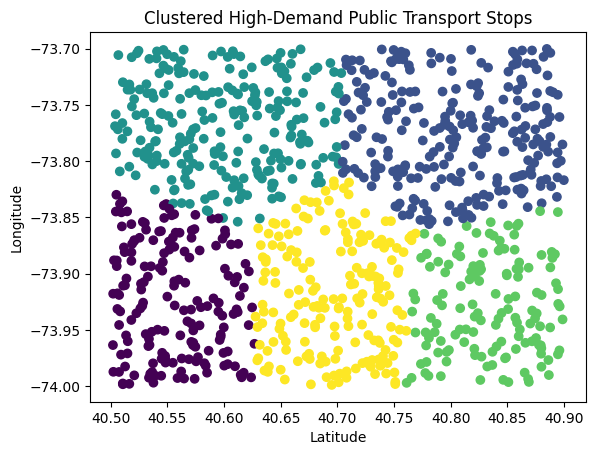

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Public Transport Data (Example CSV Format)
# Columns: stop_id, latitude, longitude, passengers, timestamp
df = pd.read_csv("public_transport_data (3).csv")

# Convert timestamp to hours (for demand analysis)
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

# Cluster high-demand stops using K-Means
num_clusters = 5  # Adjust based on city size
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Create a graph of routes using NetworkX
G = nx.Graph()

# Add edges based on stop connections
for i in range(len(df) - 1):
    G.add_edge(df.loc[i, "stop_id"], df.loc[i + 1, "stop_id"],
               weight=np.linalg.norm(df.loc[i, ['latitude', 'longitude']] - df.loc[i + 1, ['latitude', 'longitude']]))

# Find the shortest path between major hubs (optimized route)
shortest_routes = {}
for i in range(num_clusters):
    for j in range(i + 1, num_clusters):
        hub1 = df[df["cluster"] == i]["stop_id"].iloc[0]
        hub2 = df[df["cluster"] == j]["stop_id"].iloc[0]
        shortest_routes[(hub1, hub2)] = nx.shortest_path(G, source=hub1, target=hub2, weight='weight')

# Analyze demand and adjust schedules
demand_by_hour = df.groupby("hour")["passengers"].sum()
peak_hours = demand_by_hour.idxmax()  # Find peak demand hour
off_peak_hours = demand_by_hour.idxmin()  # Find least busy hour

# Suggest route and schedule optimization
print("Optimized Routes Between Major Hubs:", shortest_routes)
print(f"Increase buses during peak hour: {peak_hours}")
print(f"Reduce buses during off-peak hour: {off_peak_hours}")

# Visualize Clusters
plt.scatter(df["latitude"], df["longitude"], c=df["cluster"], cmap="viridis")
plt.title("Clustered High-Demand Public Transport Stops")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,stop_id,latitude,longitude,passengers,timestamp,hour,cluster
0,1,40.649816,-73.944460,27,2024-03-01 05:22:00,5,4
1,2,40.880286,-73.837430,6,2024-03-01 08:54:00,8,1
2,3,40.792798,-73.738116,34,2024-03-01 22:16:00,22,1
3,4,40.739463,-73.780333,27,2024-03-01 20:28:00,20,1
4,5,40.562407,-73.758032,13,2024-03-01 13:42:00,13,2


In [ ]:
df.head()

,date,traffic,weather,public_transport,carbon_emission,sustainable
0,2024-12-30,94,Clear,82,0.85,False
1,2024-12-31,56,Rain,77,0.77,False
2,2025-01-01,85,Clear,95,0.21,True
3,2025-01-02,69,Rain,80,0.83,False
4,2025-01-03,86,Clear,77,0.99,False


RMSE: 0.14 carbon emission


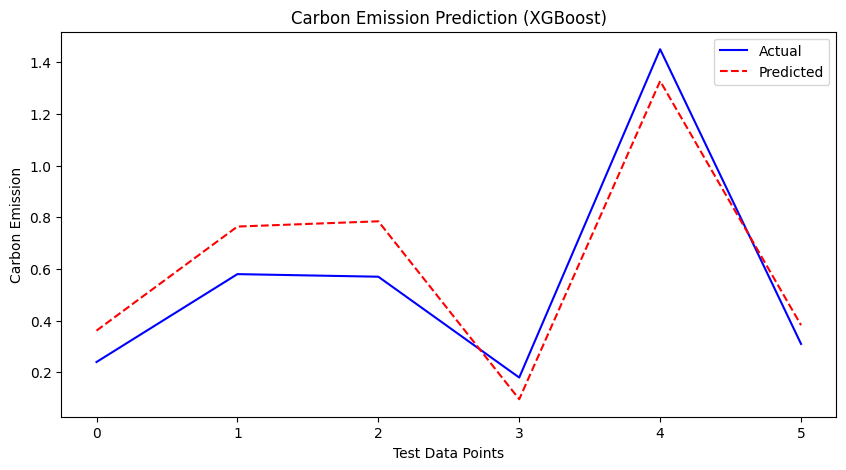

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data.csv")

# Convert date to datetime and extract useful time-based features
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

# Encode categorical features (e.g., weather conditions)
if 'weather' in df.columns:
    df['weather'] = LabelEncoder().fit_transform(df['weather'])

# Select relevant features
features = ['hour', 'day_of_week', 'traffic', 'public_transport']
if 'weather' in df.columns:
    features.append('weather')

target = 'carbon_emission'  # Assuming carbon_emission is the target variable

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f} carbon emission")

# Plot actual vs predicted carbon emission
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Test Data Points")
plt.ylabel("Carbon Emission")
plt.title("Carbon Emission Prediction (XGBoost)")
plt.legend()
plt.show()